In [14]:
import pandas as pd

In [15]:
# load the cvs file into a pandas DataFrame
# use a try-except block to handle potential errors
try:
    df = pd.read_csv('/Users/mirnadellamonicaioshida/Desktop/digital-marketing_mini/digital_marketing_campaign_dataset.csv')
    print("CSV file loaded successfully.")

    # --- initial checks ---
    # check 1: display the first few rows to understand the data structure
    print("\n--- first 5 rows of the dataset ---")
    print(df.head())

    # check 2: use .info() to get a concise summary of the dataframe
    # this is great for checking data types and non-null counts
    print("\n--- DataFrame info ---")
    print(df.info())

    # check 3: use .isnull() .sum() to count missing values in each column
    print("\n--- Missing values in each column ---")
    print(df.isnull().sum())

except FileNotFoundError:
    print("❌ Error: The file 'digital_marketing_campaign_dataset.csv' was not found.")
    print("Please make sure the dataset is in the same directory as your script or notebook.")


CSV file loaded successfully.

--- first 5 rows of the dataset ---
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940            

In [16]:
print("📊 Starting Exploratory Data Analysis...")

# --- Baseline Performance ---
print("\n--- Overall Campaign Performance ---")

# calculate total ad spend
total_ad_spend = df['AdSpend'].sum()
print(f"Total Ad Spend: ${total_ad_spend:,.2f}")

#calculate total conversions
total_conversions = df['Conversion'].sum()
print(f"Total Conversions: {total_conversions:,}")

# calculate total clicks (using WebsiteVisits as a proxy)
total_clicks = df['WebsiteVisits'].sum()
print(f"Total Clicks (Website Visits): {total_clicks:,}")

# --- channel-specific performance ---
print("\n--- Channel-Specific Performance ---")

# group by 'CampaignChannel' and calculate total spend and conversions for each 
channel_performance = df.groupby('CampaignChannel').agg(
    TotalAdSpend = ('AdSpend', 'sum'),
    TotalConversions = ('Conversion', 'sum')
).reset_index()

# calculate Cost Per Acquisition (CPA) for each channel
# CPA = Total Ad Spend / Total Conversions
# We add a small number (1e-6) to the denominator to avoid division by zero errors
# in case a channel has 0 conversions.
channel_performance['CPA'] = channel_performance['TotalAdSpend'] / (channel_performance['TotalConversions'] + 1e-6)

# sort the channels by CPA in ascending order to see the most efficient ones first
channel_performance_sorted = channel_performance.sort_values(by='CPA', ascending=True)


print("Here is the performance breakdown per channel, sorted by efficiency (lowest CPA):")
print(channel_performance_sorted)


📊 Starting Exploratory Data Analysis...

--- Overall Campaign Performance ---
Total Ad Spend: $40,007,558.64
Total Conversions: 7,012
Total Clicks (Website Visits): 198,013

--- Channel-Specific Performance ---
Here is the performance breakdown per channel, sorted by efficiency (lowest CPA):
  CampaignChannel  TotalAdSpend  TotalConversions          CPA
1             PPC  8.199237e+06              1461  5612.071852
3             SEO  7.740904e+06              1359  5696.029338
2        Referral  8.653519e+06              1518  5700.605191
4    Social Media  7.542323e+06              1319  5718.213225
0           Email  7.871576e+06              1355  5809.281067


🎨 Generating visualizations...


/var/folders/lm/wjclryz92n788zm1qf9fzh2w0000gn/T/ipykernel_59075/3152575391.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


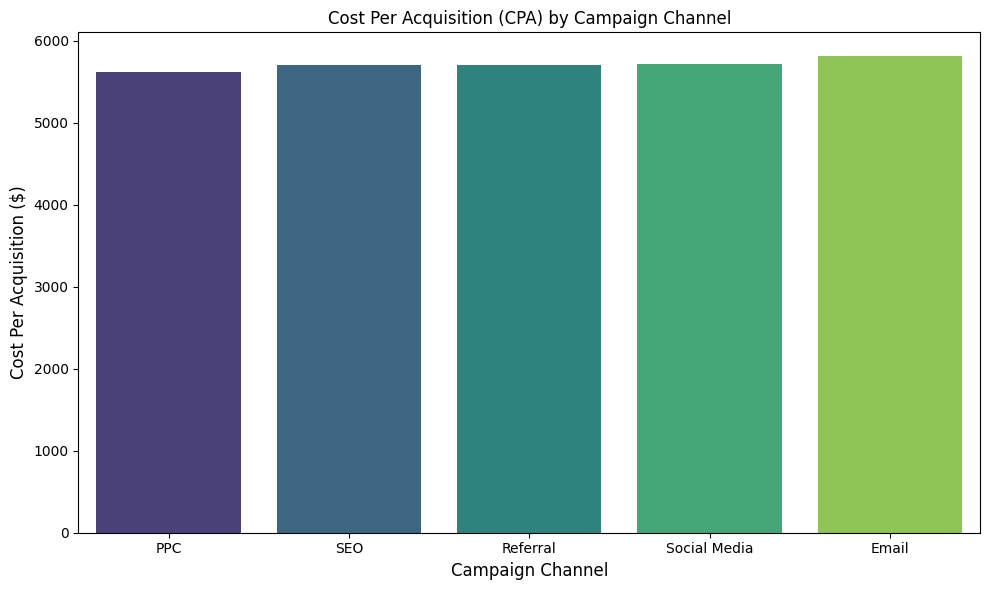

✅ CPA comparison chart saved as 'cpa_by_channel.png'
✅ Total conversions chart saved as 'conversions_by_channel.png'

Visualizations are ready!


/var/folders/lm/wjclryz92n788zm1qf9fzh2w0000gn/T/ipykernel_59075/3152575391.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 640x480 with 0 Axes>

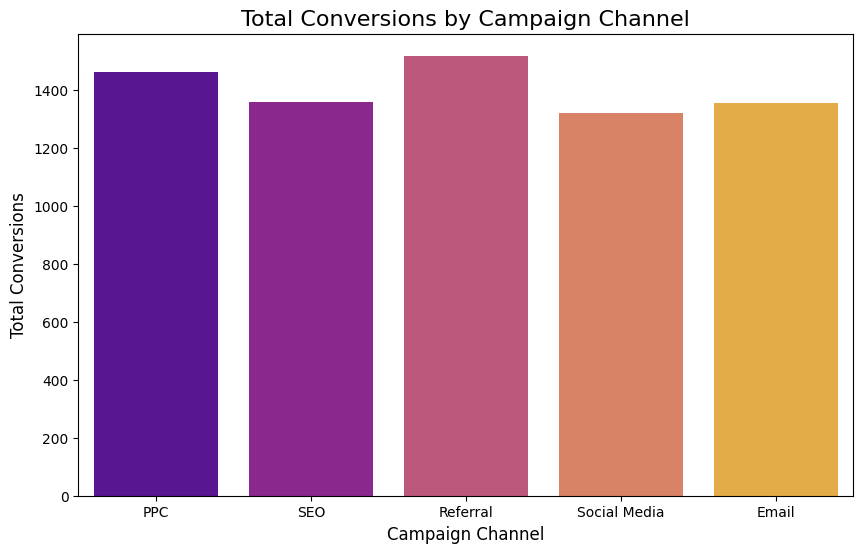

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🎨 Generating visualizations...")

# --- visualization 1: Cost Per Acquisition (CPA) by Channel ---
# this is the most important visual for our budget recommendation.

plt.figure(figsize=(10, 6)) # sets the size of the plot
sns.barplot(
    x='CampaignChannel', 
    y='CPA', 
    data=channel_performance_sorted, palette='viridis'
)
plt.title("Cost Per Acquisition (CPA) by Campaign Channel")
plt.xlabel("Campaign Channel", fontsize=12)
plt.ylabel("Cost Per Acquisition ($)", fontsize=12)
plt.xticks(rotation=0) # keeps the channel names horizontal for readability
plt.tight_layout() # adjusts plot to ensure everything fits without overlapping
plt.show()

#save the figure to a file
plt.savefig('cpa_by_channel.png')
print("✅ CPA comparison chart saved as 'cpa_by_channel.png'")

# --- visualization 2: Total Conversions by Channel ---
# this chart provides context on which channels drive the most volume

plt.figure(figsize=(10, 6))
sns.barplot(
    x='CampaignChannel', 
    y='TotalConversions', 
    data=channel_performance_sorted, palette='plasma'
)
plt.title("Total Conversions by Campaign Channel", fontsize=16)
plt.xlabel("Campaign Channel", fontsize=12)
plt.ylabel("Total Conversions", fontsize=12)

# save the second figure to a file
plt.savefig('conversions_by_channel.png')
print("✅ Total conversions chart saved as 'conversions_by_channel.png'")

print("\nVisualizations are ready!")
# In a Jupyter Notebook, the plots would display automatically after each block.
# If running as a script, you would open the saved PNG files to see the charts.


🎨 Generating enhanced visualizations with value labels...


/var/folders/lm/wjclryz92n788zm1qf9fzh2w0000gn/T/ipykernel_59075/689701451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


✅ CPA chart with labels saved as 'cpa_by_channel_with_labels.png'


/var/folders/lm/wjclryz92n788zm1qf9fzh2w0000gn/T/ipykernel_59075/689701451.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


✅ Total conversions chart with labels saved as 'conversions_by_channel_with_labels.png'

Visualizations are ready!


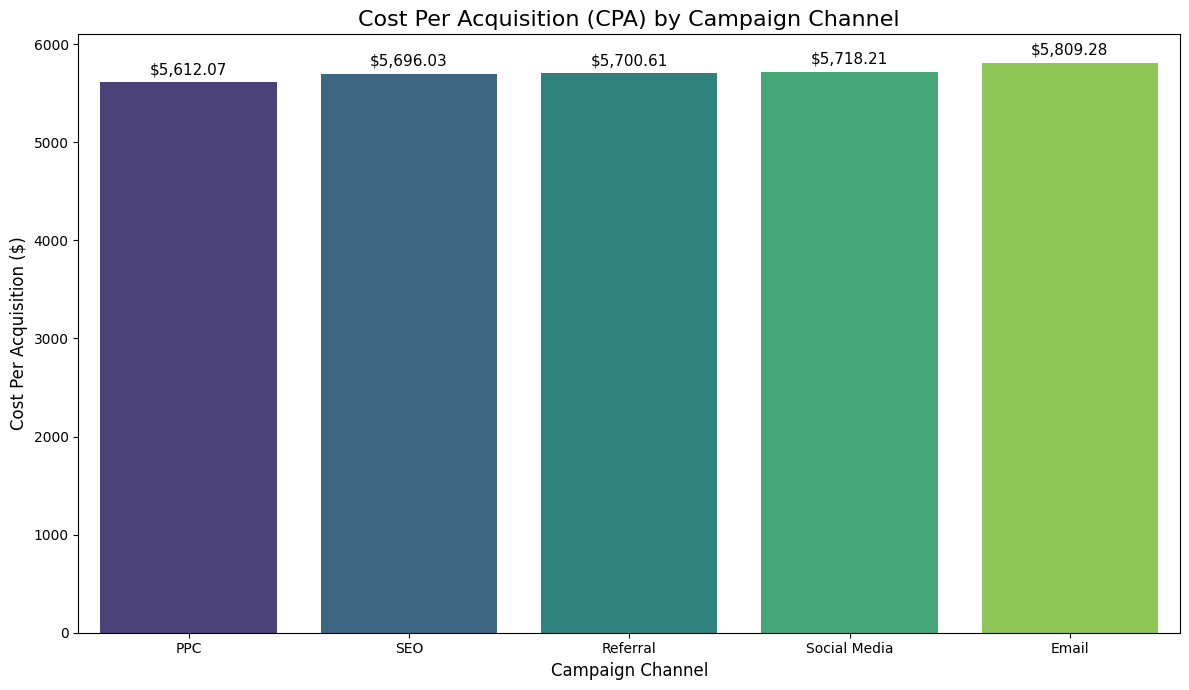

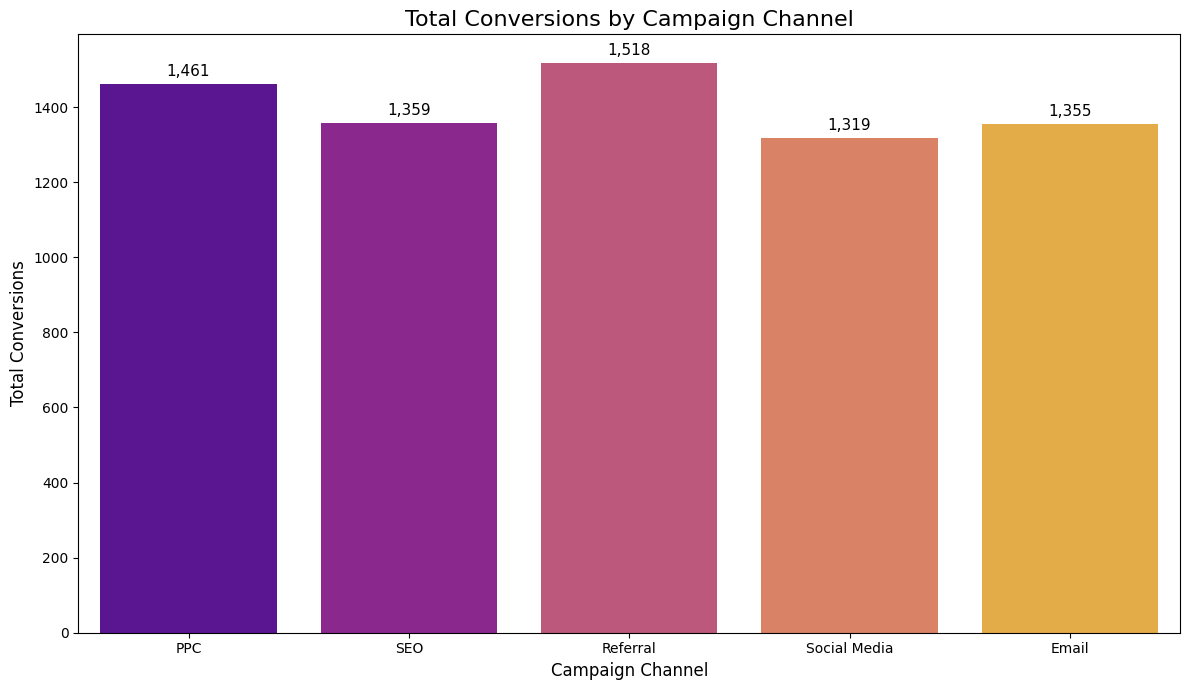

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("🎨 Generating enhanced visualizations with value labels...")

# --- Visualization 1: CPA by Channel with Labels ---

plt.figure(figsize=(12, 7))
ax1 = sns.barplot(
    x='CampaignChannel',
    y='CPA',
    data=channel_performance_sorted,
    palette='viridis'
)

# This is the new part: Add labels to the bars
for p in ax1.patches:
    ax1.annotate(f'${p.get_height():,.2f}',           # The text to display (formatted as currency)
                 (p.get_x() + p.get_width() / 2., p.get_height()), # The (x, y) position of the text
                 ha = 'center', va = 'center',       # Center the text horizontally and vertically
                 xytext = (0, 9),                  # Offset the text slightly above the bar
                 textcoords = 'offset points',
                 fontsize=11, color='black')

ax1.set_title('Cost Per Acquisition (CPA) by Campaign Channel', fontsize=16)
ax1.set_xlabel('Campaign Channel', fontsize=12)
ax1.set_ylabel('Cost Per Acquisition ($)', fontsize=12)
plt.tight_layout()
plt.savefig('cpa_by_channel_with_labels.png')
print("✅ CPA chart with labels saved as 'cpa_by_channel_with_labels.png'")


# --- Visualization 2: Total Conversions by Channel with Labels ---

plt.figure(figsize=(12, 7))
ax2 = sns.barplot(
    x='CampaignChannel',
    y='TotalConversions',
    data=channel_performance_sorted,
    palette='plasma'
)

# Add labels to this chart as well
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height()):,}',       # The text to display (formatted as an integer with commas)
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points',
                 fontsize=11, color='black')

ax2.set_title('Total Conversions by Campaign Channel', fontsize=16)
ax2.set_xlabel('Campaign Channel', fontsize=12)
ax2.set_ylabel('Total Conversions', fontsize=12)
plt.tight_layout()
plt.savefig('conversions_by_channel_with_labels.png')
print("✅ Total conversions chart with labels saved as 'conversions_by_channel_with_labels.png'")

print("\nVisualizations are ready!")